# seaborn_altair.FacetGrid

In [1]:
import seaborn_altair as salt
import seaborn_altair.pyplot as palt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset("tips")
kws = dict(s=50, linewidth=.5, edgecolor="w")

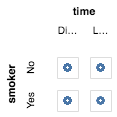

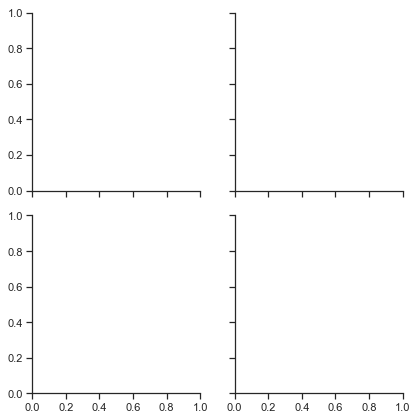

In [2]:
sns.set(style="ticks", color_codes=True)
display(salt.FacetGrid(tips, col="time", row="smoker"))
g = sns.FacetGrid(tips, col="time", row="smoker")

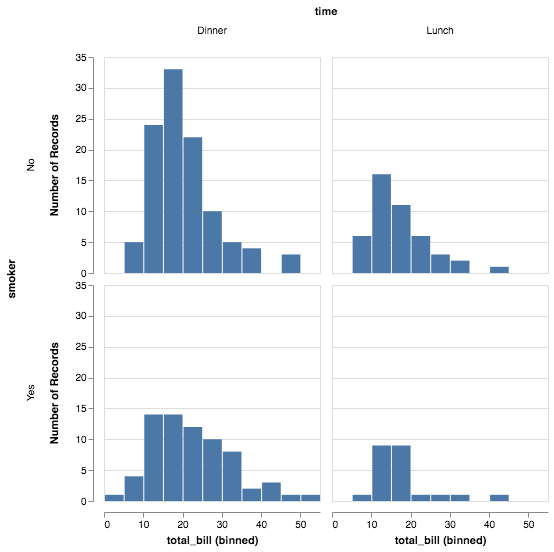

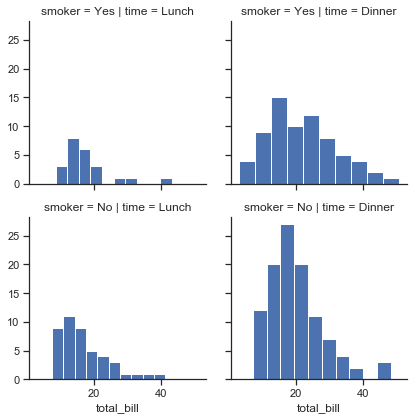

In [3]:
c = salt.FacetGrid(tips, col="time",  row="smoker")
display(c.map_dataframe(palt.hist, "total_bill"))

g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

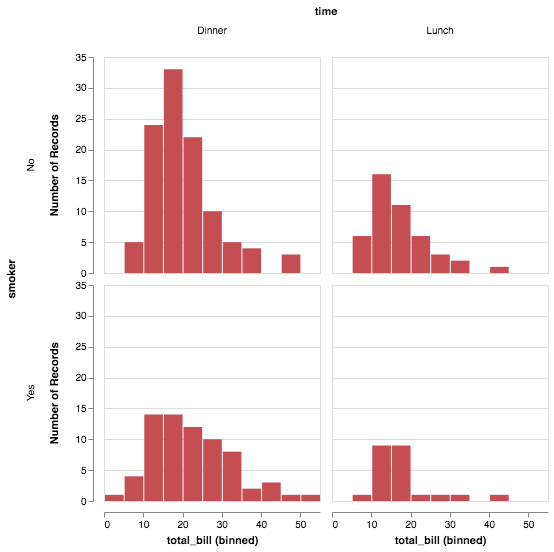

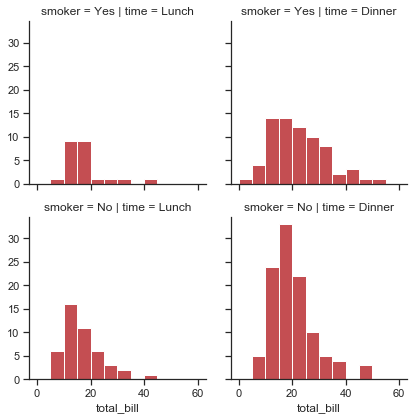

In [4]:
import numpy as np
bins = np.arange(0, 65, 5)

c = salt.FacetGrid(tips, col="time",  row="smoker")
display(c.map_dataframe(palt.hist, "total_bill", color="r"))

g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", bins=bins, color="r")

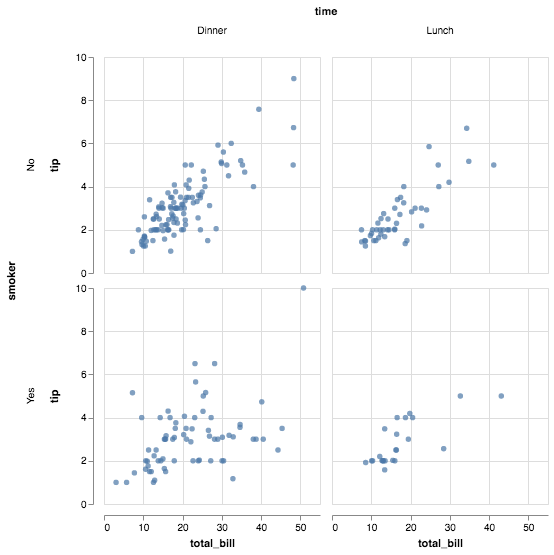

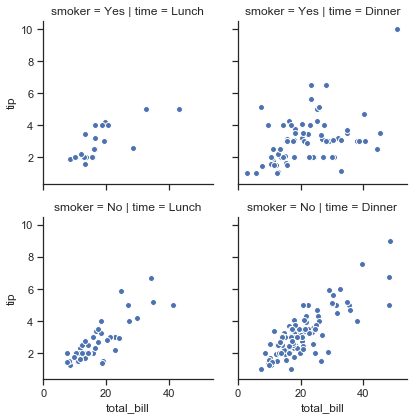

In [5]:
c = salt.FacetGrid(tips, col="time",  row="smoker")
display(c.map_dataframe(palt.scatter, "total_bill", "tip"))

g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

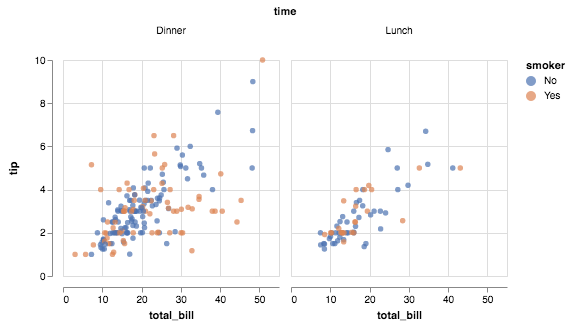

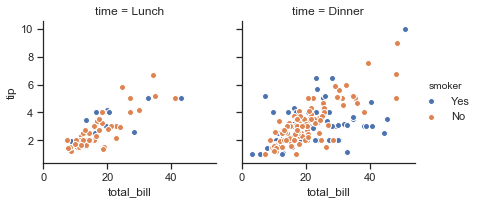

In [6]:
c = salt.FacetGrid(tips, col="time", hue="smoker")
display(c.map_dataframe(palt.scatter, "total_bill", "tip"))

g = sns.FacetGrid(tips, col="time", hue="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend()

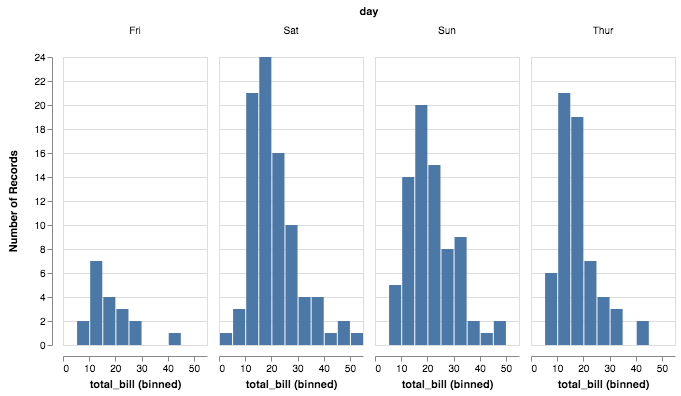

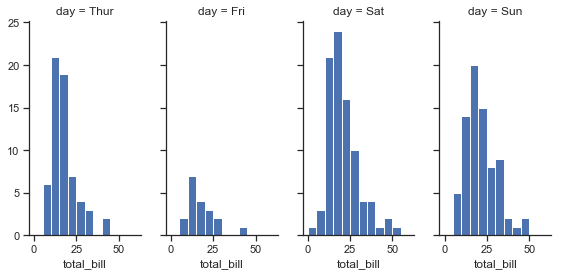

In [7]:
c = salt.FacetGrid(tips, col="day", height=4, aspect=.5)
display(c.map_dataframe(palt.hist, "total_bill"))

g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g = g.map(plt.hist, "total_bill", bins=bins)

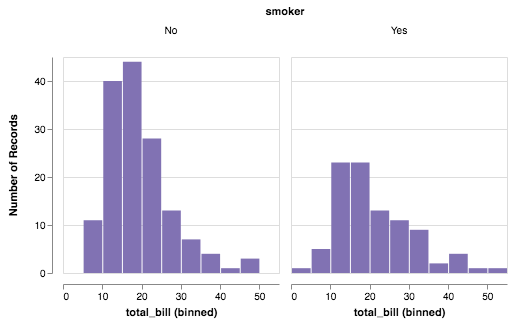

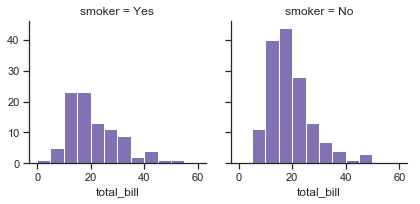

In [8]:
c = salt.FacetGrid(tips, col="smoker")
display(c.map_dataframe(palt.hist, "total_bill", color="m"))

g = sns.FacetGrid(tips, col="smoker", col_order=["Yes", "No"])
g = g.map(plt.hist, "total_bill", bins=bins, color="m")

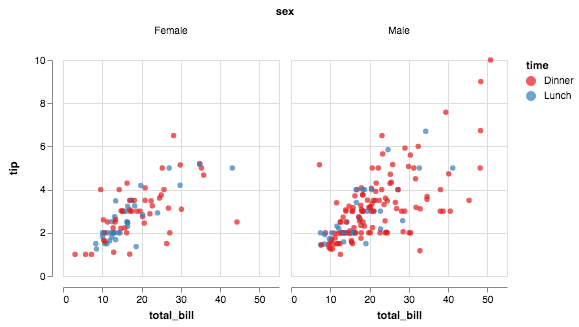

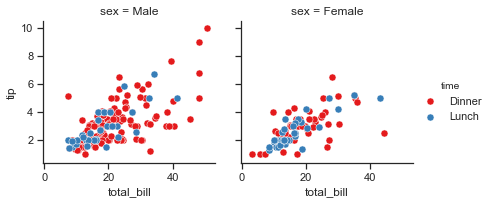

In [9]:
c = salt.FacetGrid(tips, col="sex", hue="time", palette="Set1")
display(c.map_dataframe(palt.scatter, "total_bill", "tip"))

g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1", hue_order=["Dinner", "Lunch"])
g = g.map(plt.scatter, "total_bill", "tip", **kws).add_legend()

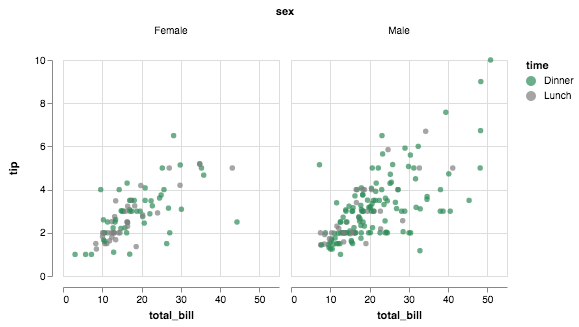

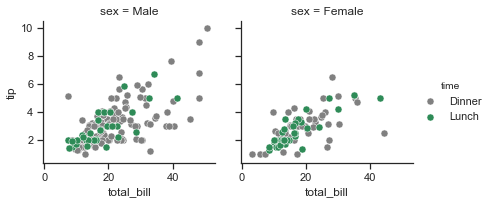

In [10]:
pal = dict(Lunch="seagreen", Dinner="gray")
pal2 = ["seagreen", "gray"]

c = salt.FacetGrid(tips, col="sex", hue="time", palette=pal2)
display(c.map_dataframe(palt.scatter, "total_bill", "tip"))

g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal, hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

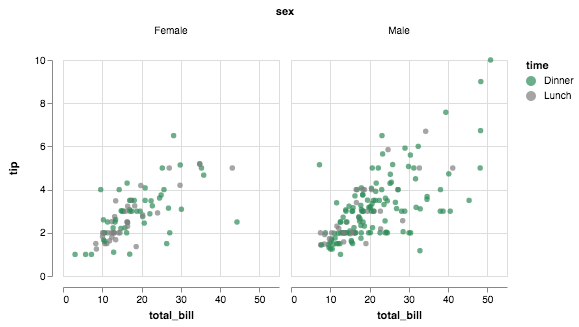

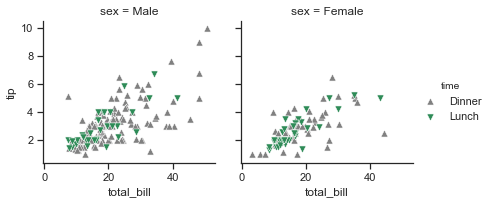

In [11]:
c = salt.FacetGrid(tips, col="sex", hue="time", palette=pal2)
display(c.map_dataframe(palt.scatter, "total_bill", "tip"))

g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal, hue_order=["Dinner", "Lunch"], hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

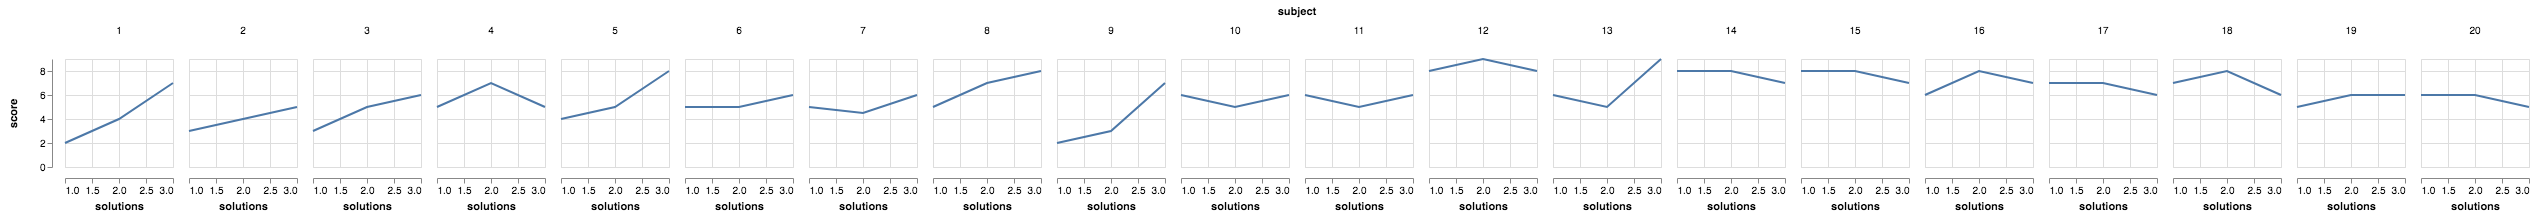

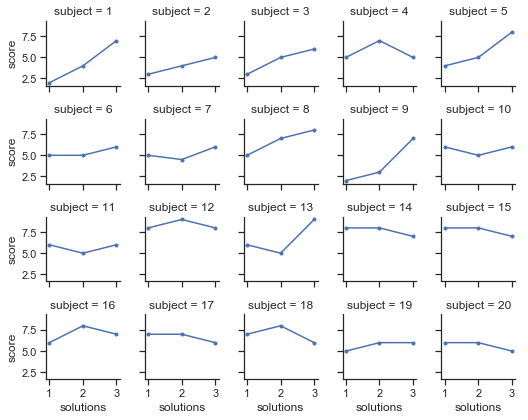

In [12]:
attend = sns.load_dataset("attention")
c = salt.FacetGrid(attend, col="subject", height=1.5)
display(c.map_dataframe(palt.plot, "solutions", "score"))

g = sns.FacetGrid(attend, col="subject", col_wrap=5, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")

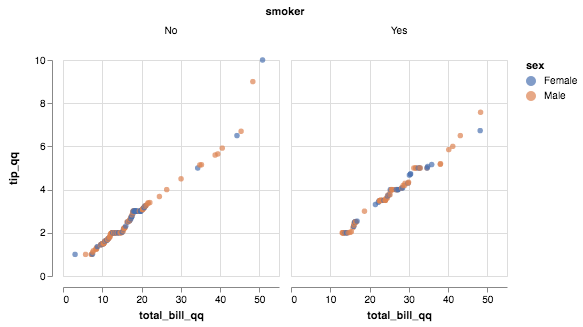

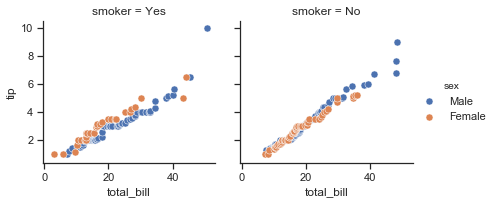

In [13]:
from scipy import stats

def qqplot_alt(x, y, data, **kwargs):
    _, xr = stats.probplot(data[x], fit=False)
    _, yr = stats.probplot(data[y], fit=False)
    qqdata = data
    xqq = '%s_qq' % x
    yqq = '%s_qq' % y
    qqdata[xqq] = xr
    qqdata[yqq] = yr
    return palt.scatter(xqq, yqq, data=qqdata, **kwargs)
c = salt.FacetGrid(tips, col="smoker", hue="sex")
display(c.map_dataframe(qqplot_alt, "total_bill", "tip"))

def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g = g.map(qqplot, "total_bill", "tip", **kws).add_legend()

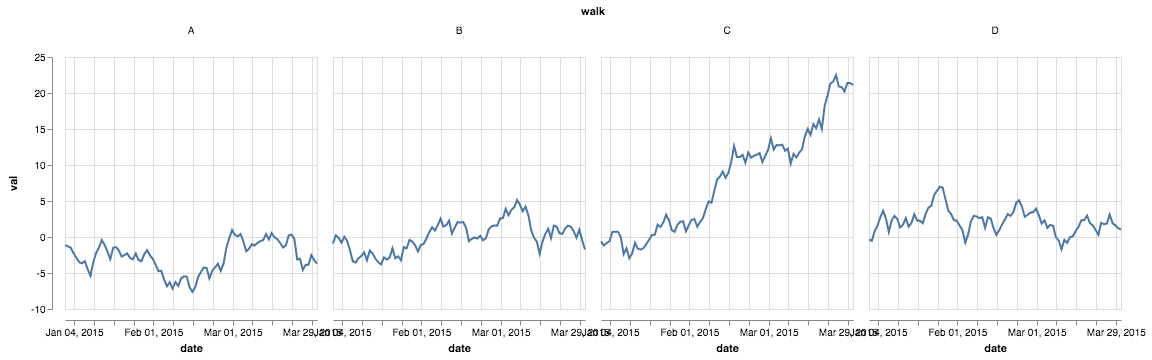

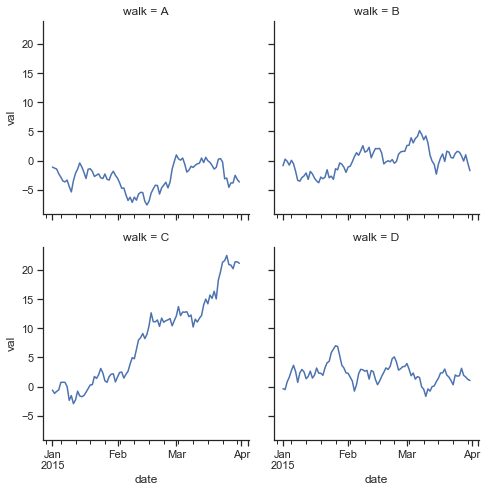

In [20]:
df = pd.DataFrame(
    data=np.random.randn(90, 4),
    columns=pd.Series(list("ABCD"), name="walk"),
    index=pd.date_range("2015-01-01", "2015-03-31",
                        name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")

def dateplot_alt(x, y, **kwargs):
    data = kwargs.pop("data")
    return palt.plot(x=x, y=y, data=data, **kwargs)
c = salt.FacetGrid(df, col="walk", height=3.5)
display(c.map_dataframe(dateplot_alt, "date", "val"))

def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=2, height=3.5)
g = g.map_dataframe(dateplot, "date", "val")

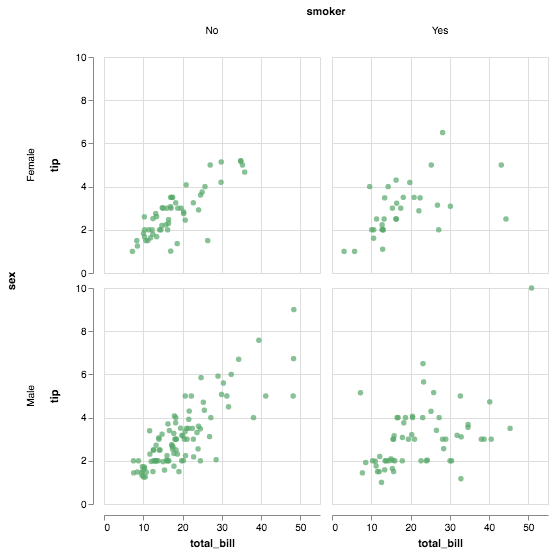

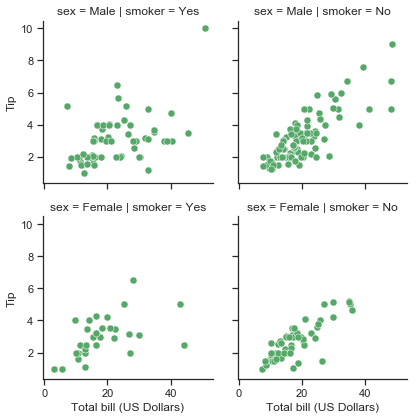

In [15]:
c = salt.FacetGrid(tips, col="smoker", row="sex")
display(c.map_dataframe(palt.scatter, "total_bill", "tip", color="g"))

g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.scatter, "total_bill", "tip", color="g", **kws).set_axis_labels("Total bill (US Dollars)", "Tip"))

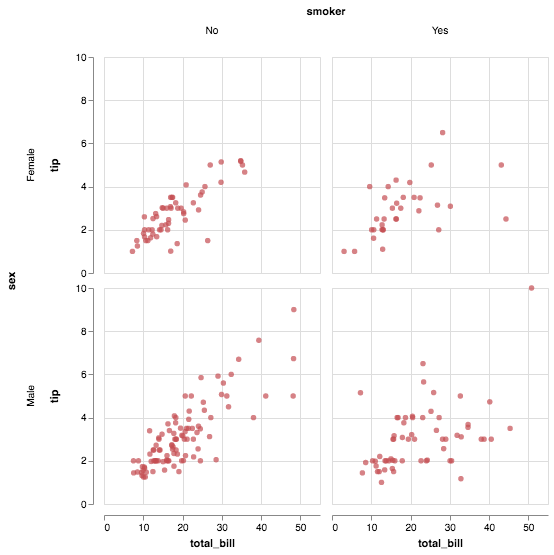

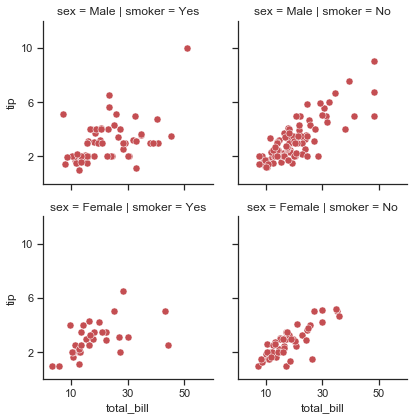

In [16]:
c = salt.FacetGrid(tips, col="smoker", row="sex")
display(c.map_dataframe(palt.scatter, "total_bill", "tip", color="r"))

g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.scatter, "total_bill", "tip", color="r", **kws)
    .set(xlim=(0, 60), ylim=(0, 12),
        xticks=[10, 30, 50], yticks=[2, 6, 10]))

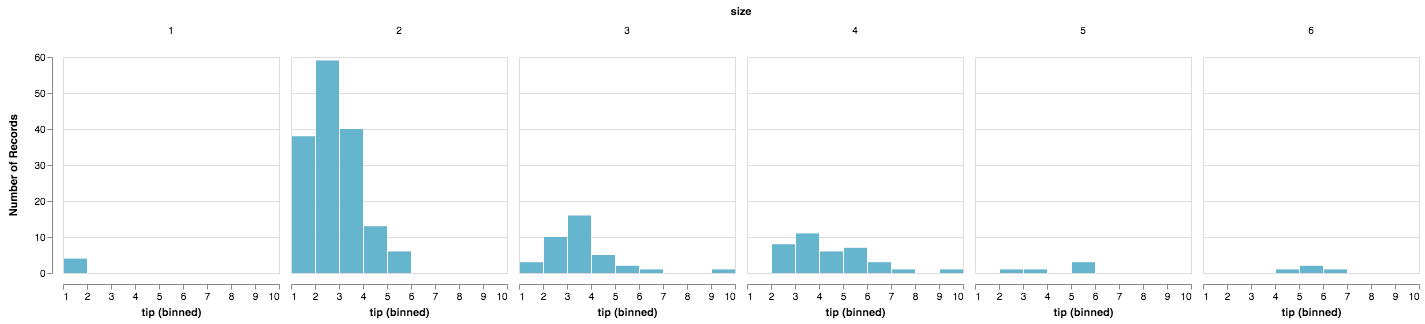

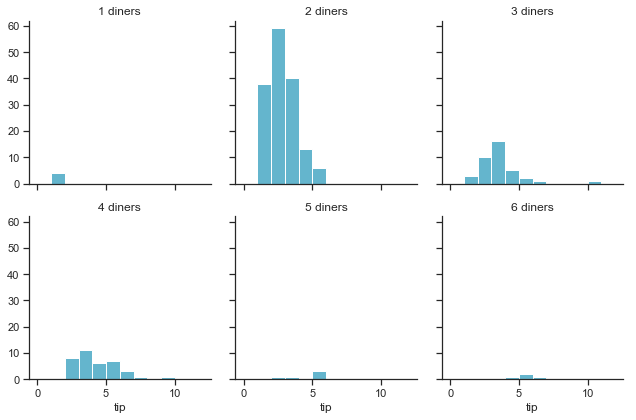

In [17]:
c = salt.FacetGrid(tips, col="size")
display(c.map_dataframe(palt.hist, "tip", color="c"))

g = sns.FacetGrid(tips, col="size", col_wrap=3)
g = (g.map(plt.hist, "tip", bins=np.arange(0, 13), color="c")
      .set_titles("{col_name} diners"))

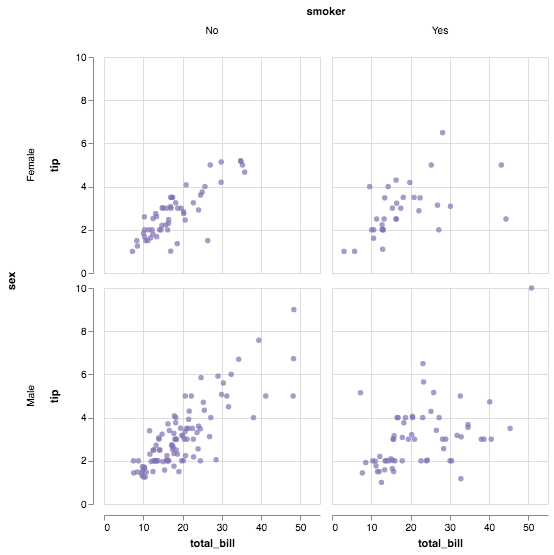

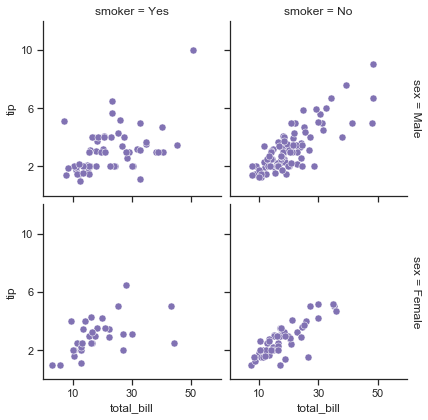

In [18]:
c = salt.FacetGrid(tips, col="smoker", row="sex")
display(c.map_dataframe(palt.scatter, "total_bill", "tip", color="m"))

g = sns.FacetGrid(tips, col="smoker", row="sex",
                  margin_titles=True)
g = (g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
      .set(xlim=(0, 60), ylim=(0, 12),
           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.05, hspace=.05))